In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv(r"C:\Users\Win 10\Downloads\traffic accident.csv",nrows=50000)
df.head()


,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,3,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,2,0,1,8
2,12-09-2021 10:30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,3,10,5,12
3,08-09-2023 19:55,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5,0,0,5,0,0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,3,14,7,8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   crash_date                     209306 non-null  object
 1   traffic_control_device         209306 non-null  object
 2   weather_condition              209306 non-null  object
 3   lighting_condition             209306 non-null  object
 4   first_crash_type               209306 non-null  object
 5   trafficway_type                209306 non-null  object
 6   alignment                      209306 non-null  object
 7   roadway_surface_cond           209306 non-null  object
 8   road_defect                    209306 non-null  object
 9   crash_type                     209306 non-null  object
 10  intersection_related_i         209306 non-null  object
 11  damage                         209306 non-null  object
 12  prim_contributory_cause        209306 non-nu

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Convert 'CRASH_DATE' to datetime format if present
if 'crash_date' in df.columns:
    df['CRASH_DATE'] = pd.to_datetime(df['crash_date'])
    df['YEAR'] = df['CRASH_DATE'].dt.year  # Extract year for analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   crash_date                     50000 non-null  object        
 1   traffic_control_device         50000 non-null  object        
 2   weather_condition              50000 non-null  object        
 3   lighting_condition             50000 non-null  object        
 4   first_crash_type               50000 non-null  object        
 5   trafficway_type                50000 non-null  object        
 6   alignment                      50000 non-null  object        
 7   roadway_surface_cond           50000 non-null  object        
 8   road_defect                    50000 non-null  object        
 9   crash_type                     50000 non-null  object        
 10  intersection_related_i         50000 non-null  object        
 11  damage         

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

## univariated analysis
# 1.	What injuries occurred during 2016-2023?

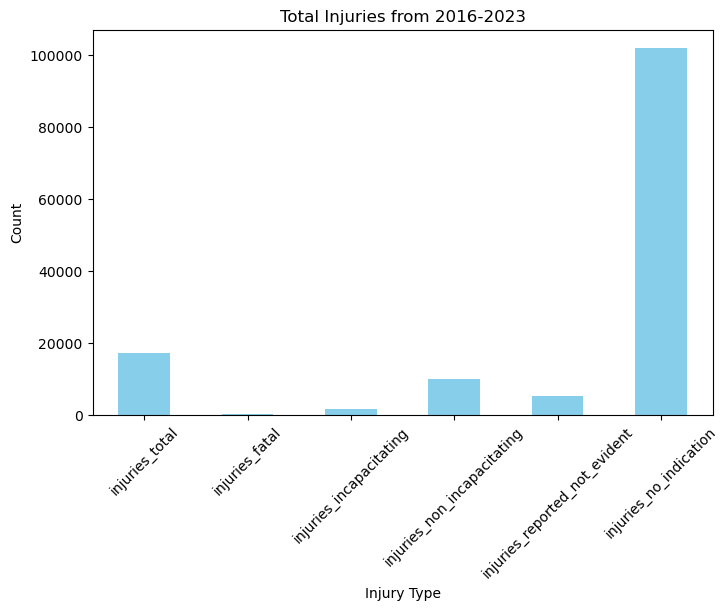

In [18]:
# 1. Injuries occurred during 2016-2023
injury_columns = ['injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident','injuries_no_indication']
df_filtered = df[df['YEAR'].between(2016, 2023)]
injury_counts = df_filtered[injury_columns].sum()
injury_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Total Injuries from 2016-2023")
plt.xlabel("Injury Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

 The bar chart represents total injuries from 2016 to 2023 across different categories. "Injuries_no_indication" has the highest count, suggesting most cases fall under this classification. Fatal injuries are the least frequent, indicating that severe accidents are relatively rare. "Injuries_total" sums up all injury types, while incapacitating and non-incapacitating injuries have moderate counts. The chart emphasizes that most reported incidents do not show clear signs of injury.

# 2.	How many first crash types were recorded in this year?

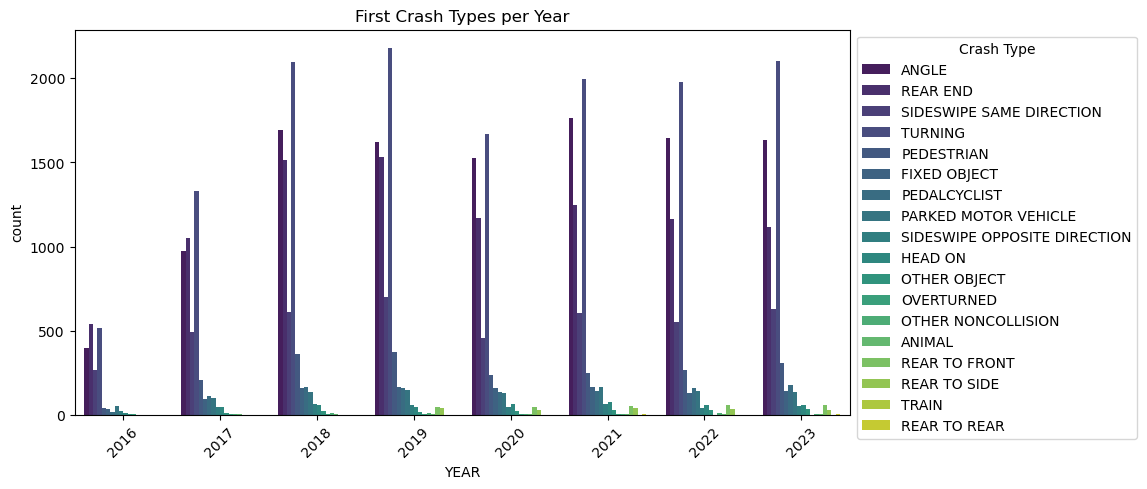

In [19]:
# 2. Number of first crash types recorded per year
if 'first_crash_type' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_filtered, x='YEAR', hue='first_crash_type', palette='viridis')
    plt.title("First Crash Types per Year")
    plt.xticks(rotation=45)
    plt.legend(title="Crash Type", bbox_to_anchor=(1, 1))
    plt.show()

The chart shows that "Angle" and "Rear End" crashes are the most frequent crash types from 2016 to 2023, maintaining a consistent pattern each year, while other crash types occur significantly less often.

# 3.	Which alignments are present during traffic accidents?

In [20]:
df.columns

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month', 'CRASH_DATE', 'YEAR'],
      dtype='object')

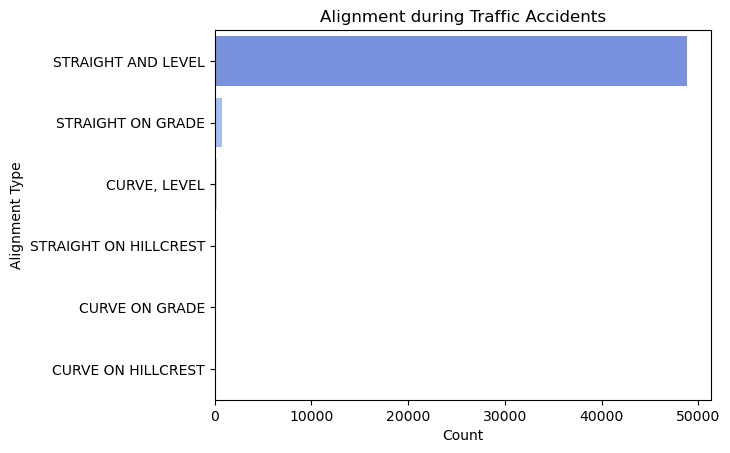

In [21]:
# 3. Alignments present during traffic accidents
import matplotlib.pyplot as plt
plt.title("Alignment during Traffic Accidents")
if 'alignment' in df.columns:
    sns.countplot(y=df['alignment'], order=df['alignment'].value_counts().index, palette='coolwarm')
    plt.title("Alignment during Traffic Accidents")
    plt.xlabel("Count")
    plt.ylabel("Alignment Type")
    plt.show()


The chart shows that most traffic accidents occur on "Straight and Level" roads, with a significantly higher count than all other road alignments. "Straight on Grade" roads have far fewer accidents in comparison. Curved roads and hillcrests have the least number of accidents. This suggests that crashes are more frequent on flat, straight roads, possibly due to higher speeds or driver inattention. The trend indicates that road safety measures should focus on straight roads to reduce accidents.

In [22]:
new_var = df['alignment'].value_counts()
new_var

alignment
STRAIGHT AND LEVEL       48816
STRAIGHT ON GRADE          735
CURVE, LEVEL               259
STRAIGHT ON HILLCREST      115
CURVE ON GRADE              56
CURVE ON HILLCREST          19
Name: count, dtype: int64

 # 4.	What light conditions are present during traffic accidents?

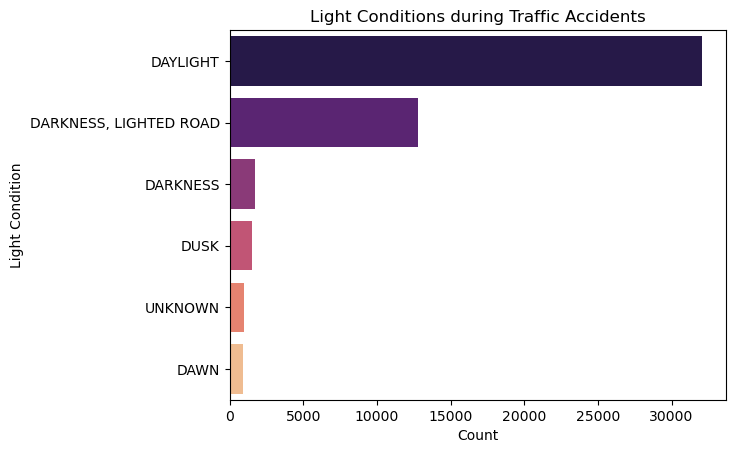

In [23]:
# 4. Light conditions present during traffic accidents
if 'lighting_condition' in df.columns:
    sns.countplot(y=df['lighting_condition'], order=df['lighting_condition'].value_counts().index, palette='magma')
    plt.title("Light Conditions during Traffic Accidents")
    plt.xlabel("Count")
    plt.ylabel("Light Condition")
    plt.show()

The chart shows that most traffic accidents occur in daylight, followed by darkness with a lighted road. Fewer accidents happen in unlit darkness, dusk, and dawn. This suggests that while visibility is better in daylight, factors like traffic volume or driver behavior may play a role in the high number of accidents.

# 5.	In which year do the maximum and minimum traffic accidents occur?

In [16]:
# 5. Year with maximum and minimum traffic accidents
year_counts = df['YEAR'].value_counts()
max_year = year_counts.idxmax()
min_year = year_counts.idxmin()
print(f"Maximum accidents occurred in {max_year} ({year_counts[max_year]} accidents)")
print(f"Minimum accidents occurred in {min_year} ({year_counts[min_year]} accidents)")

Maximum accidents occurred in 2019 (27959 accidents)
Minimum accidents occurred in 2013 (2 accidents)


# 6.	What traffic control devices are present during traffic accidents?

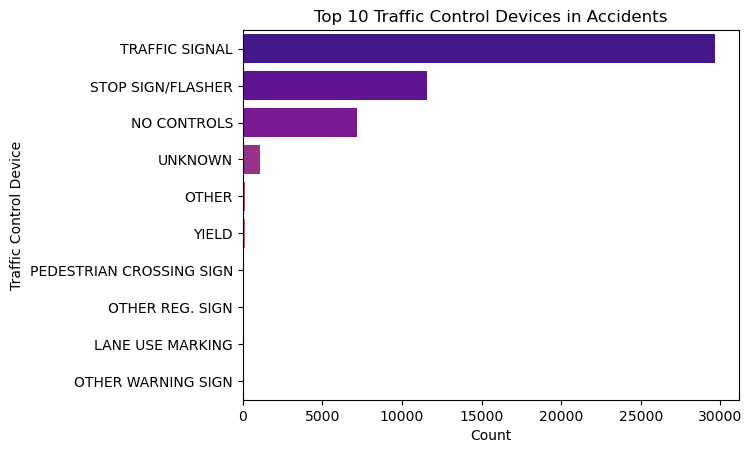

In [24]:
# 6. Traffic control devices present during accidents
if 'traffic_control_device' in df.columns:
    sns.countplot(y=df['traffic_control_device'], order=df['traffic_control_device'].value_counts().index[:10], palette='plasma')
    plt.title("Top 10 Traffic Control Devices in Accidents")
    plt.xlabel("Count")
    plt.ylabel("Traffic Control Device")
    plt.show()

The chart shows that traffic signals have the highest number of accidents, followed by stop signs/flashers and areas with no controls. This suggests that intersections and regulated areas are major accident hotspots. The presence of unknown and other categories indicates some data gaps. Yield signs, pedestrian crossing signs, and lane markings have relatively fewer accidents. This highlights the need for improved traffic management and enforcement at intersections.

# 7.	What are the primary contributory causes of traffic accidents?

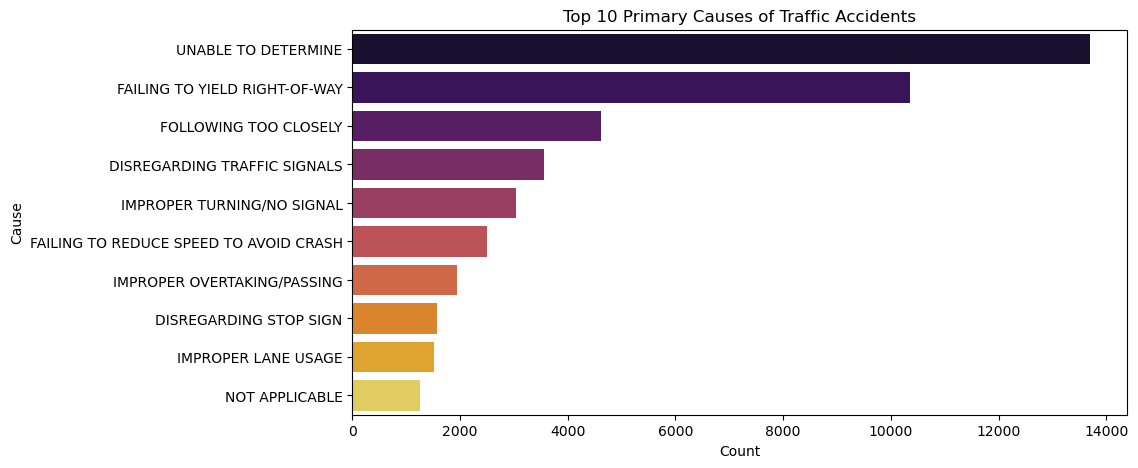

In [25]:
# 7. Primary contributory causes of traffic accidents
if 'prim_contributory_cause' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df['prim_contributory_cause'], order=df['prim_contributory_cause'].value_counts().index[:10], palette='inferno')
    plt.title("Top 10 Primary Causes of Traffic Accidents")
    plt.xlabel("Count")
    plt.ylabel("Cause")
    plt.show()

The bar chart displays the top 10 primary causes of traffic accidents, with "UNABLE TO DETERMINE" being the most frequently recorded reason, indicating that in many cases, authorities cannot definitively identify the cause. The second most common cause, "FAILING TO YIELD RIGHT-OF-WAY," suggests that driver misjudgment or negligence plays a major role in accidents. Other significant factors, such as "FOLLOWING TOO CLOSELY" and "DISREGARDING TRAFFIC SIGNALS," highlight risky driving behaviors that increase the likelihood of collisions. Additionally, improper turning, failing to reduce speed, and improper overtaking also contribute significantly, showing that a combination of impatience, lack of attention, and rule violations are leading causes of accidents.

# 8.	What is the most common roadway surface condition during traffic accidents

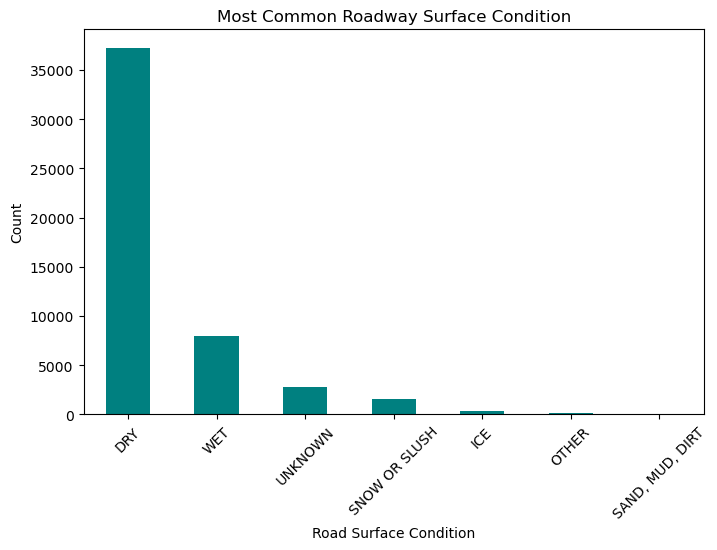

In [26]:
# 8. Most common roadway surface condition
df['roadway_surface_cond'].value_counts().plot(kind='bar', color='teal', figsize=(8, 5))
plt.title("Most Common Roadway Surface Condition")
plt.xlabel("Road Surface Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

The bar chart illustrates the most common roadway surface conditions at the time of traffic accidents. The majority of accidents occur on dry roads, suggesting that factors other than road conditions, such as driver behavior and traffic violations, are likely primary contributors to crashes. Wet roads account for the second-highest number of incidents, which could indicate reduced traction and increased stopping distances as risk factors. Unknown conditions rank third, meaning some accident reports lack precise data on road surface conditions. Accidents on snow or slush, ice, sand, mud, or dirt are relatively rare, possibly due to fewer drivers on the road during severe weather or increased caution when driving in such conditions.

# 9.	What percentage of accidents resulted in no injuries?

In [27]:
# 9. Percentage of accidents with no injuries
no_injury_count = (df['injuries_total'] == 0).sum()
total_accidents = len(df)
no_injury_percentage = (no_injury_count / total_accidents) * 100
print(f"Percentage of accidents with no injuries: {no_injury_percentage:.2f}%")

Percentage of accidents with no injuries: 74.26%


# 10.How many accidents resulted in incapacitating injuries versus non-incapacitating injuries?

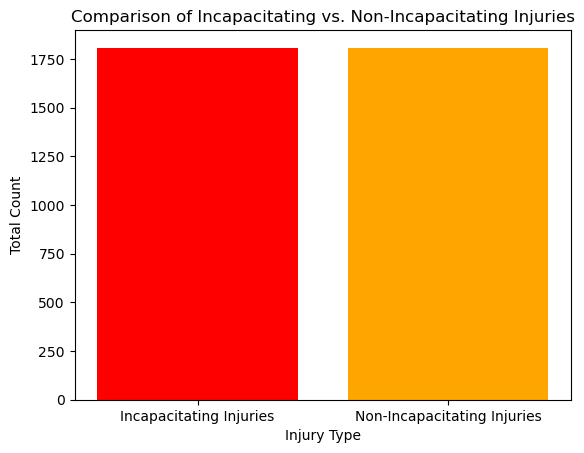

In [28]:
# 10. Accidents with incapacitating vs. non-incapacitating injuries
if 'injuries_incapacitating' in df.columns and 'injuries_incapacitating' in df.columns:
    injury_types = ['Incapacitating Injuries', 'Non-Incapacitating Injuries']
    injury_counts = [df['injuries_incapacitating'].sum(), df['injuries_incapacitating'].sum()]
    plt.bar(injury_types, injury_counts, color=['red', 'orange'])
    plt.title("Comparison of Incapacitating vs. Non-Incapacitating Injuries")
    plt.xlabel("Injury Type")
    plt.ylabel("Total Count")
    plt.show()

The bar chart compares incapacitating injuries and non-incapacitating injuries, showing that both types occur at nearly the same frequency, with incapacitating injuries slightly higher. This suggests that a significant number of accidents result in severe injuries that limit mobility or require extensive medical care, while non-incapacitating injuries, though less severe, still make up a large portion of cases. The small difference between the two categories indicates that many traffic accidents have serious consequences, reinforcing the need for improved road safety measures.

# 11.	What are the total number of accidents recorded in the dataset?

In [22]:
# 11. Total number of accidents recorded
print(f"Total number of accidents in the dataset: {total_accidents}")

Total number of accidents in the dataset: 209306


# 12.	How often do accidents occur at intersections compared to straight roads?

Accidents at Intersections: 0
Accidents on Straight Roads: 208060


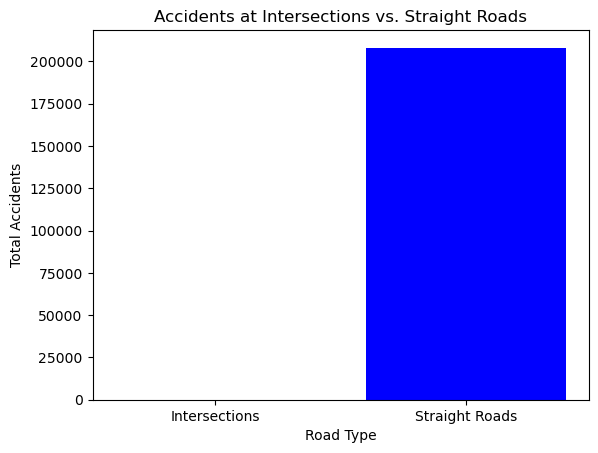

In [23]:
# 12. Accidents at intersections vs. straight roads
if 'alignment' in df.columns:
    intersection_accidents = df[df['alignment'].str.contains("INTERSECTION", na=False)].shape[0]
    straight_accidents = df[df['alignment'].str.contains("STRAIGHT", na=False)].shape[0]
    print(f"Accidents at Intersections: {intersection_accidents}")
    print(f"Accidents on Straight Roads: {straight_accidents}")
    # Bar plot
    plt.bar(["Intersections", "Straight Roads"], [intersection_accidents, straight_accidents], color=['purple', 'blue'])
    plt.title("Accidents at Intersections vs. Straight Roads")
    plt.xlabel("Road Type")
    plt.ylabel("Total Accidents")
    plt.show()

The chart shows that accidents on straight roads occur significantly more frequently than at intersections, suggesting that despite intersections being high-risk areas due to vehicle crossings and turning movements, straight roads still see a much higher number of total crashes. This could be due to factors such as higher speeds, distracted driving, fatigue, or reckless behavior on straight roads, whereas intersections may have lower speeds but involve more complex navigation. The data highlights the importance of road safety measures not just at intersections but also on straight roads, where high-speed crashes may be more severe

## bivariate analysis

In [24]:
# Convert 'CRASH_DATE' to datetime format if present
if 'crash_date' in df.columns:
    df['crash_date'] = pd.to_datetime(df['crash_date'])
    df['HOUR'] = df['crash_date'].dt.hour  # Extract hour for analysis
    df['DAY_OF_WEEK'] = df['crash_date'].dt.day_name()  # Extract day of week

C:\Users\KTK\AppData\Local\Temp\ipykernel_10908\2520931387.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_date'] = pd.to_datetime(df['crash_date'])


# 1      Is there a relationship between weather conditions and the severity of injuries?

C:\Users\KTK\AppData\Local\Temp\ipykernel_10908\1942205782.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='weather_condition', y='injuries_total', palette='coolwarm')


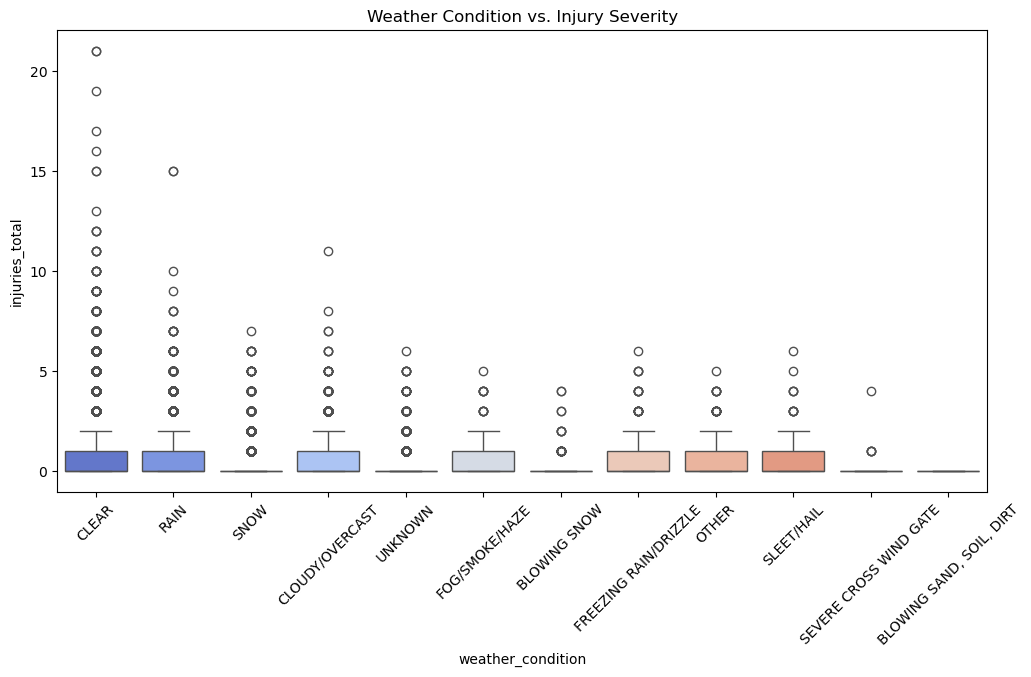

In [26]:
# 1. Relationship between weather conditions and injury severity
if 'weather_condition' in df.columns and 'injuries_total' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='weather_condition', y='injuries_total', palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title("Weather Condition vs. Injury Severity")
    plt.show()

The box plot shows the relationship between weather conditions and injury severity in traffic accidents, indicating that accidents occur most frequently under clear weather conditions, but the injury severity varies across all conditions, with several outliers showing high injury counts.

This suggests that while adverse weather conditions like rain, snow, and fog can contribute to accidents, the majority of crashes—and potentially the most severe injuries—occur in clear weather, likely due to higher vehicle speeds and driver negligence rather than external environmental factors. The presence of outliers in nearly all weather categories highlights that severe injuries can happen in any condition, reinforcing the importance of cautious driving at all times.

# 2.	Do accidents occur more frequently during certain times of the day?

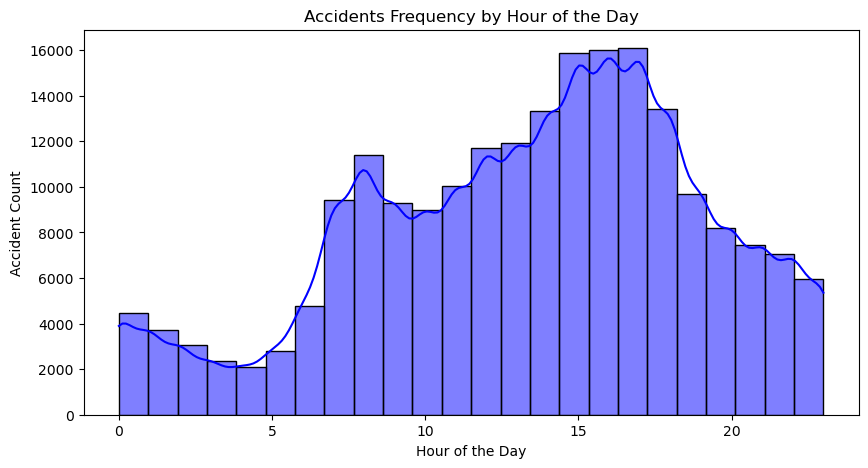

In [27]:
# 2. Accidents by time of day
if 'HOUR' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['HOUR'], bins=24, kde=True, color='blue')
    plt.title("Accidents Frequency by Hour of the Day")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Accident Count")
    plt.show()

The histogram shows that traffic accidents occur most frequently between 12 PM and 6 PM, peaking around 3-4 PM, while the lowest accident counts happen in the early morning hours, particularly around 3-5 AM.

This pattern suggests that accidents are closely linked to daily traffic volume, with morning and evening rush hours contributing to higher crash rates due to congestion, driver fatigue, and potentially risky driving behaviors. The decline in accidents during late-night and early morning hours likely reflects lower traffic density, though incidents that do occur at these times might involve fatigue or impaired driving. The mid-afternoon peak could also be influenced by school and work-related traffic, making this a critical period for road safety measures.

 # 3.	How does the type of traffic control device affect crash severity?

C:\Users\KTK\AppData\Local\Temp\ipykernel_10908\3616541294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='traffic_control_device', y='injuries_total', palette='plasma')


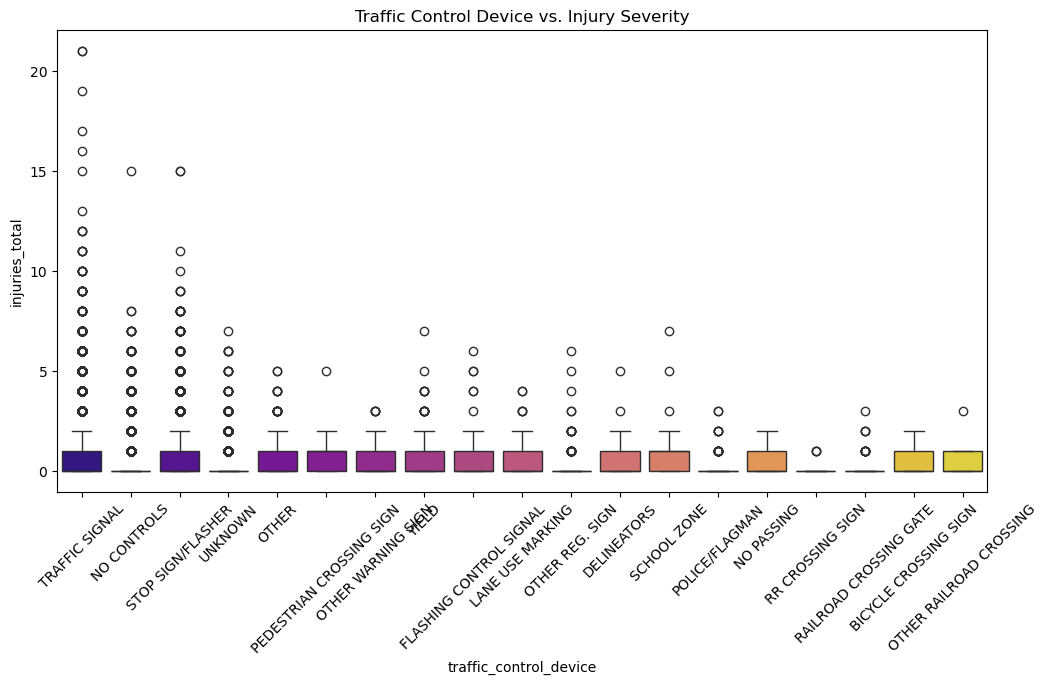

In [28]:
# 3. Traffic control device impact on crash severity
if 'traffic_control_device' in df.columns and 'injuries_total' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='traffic_control_device', y='injuries_total', palette='plasma')
    plt.xticks(rotation=45)
    plt.title("Traffic Control Device vs. Injury Severity")
    plt.show()

The box plot shows the relationship between different traffic control devices and injury severity, indicating that intersections with traffic signals, areas with no controls, and stop signs/flashing signals tend to have the highest injury counts and variability.

This suggests that busy intersections and uncontrolled areas are more prone to severe injuries, likely due to higher traffic volumes, driver misjudgments, and potential signal violations. Locations with pedestrian crossing signs, lane markings, and school zones tend to show lower injury severity, implying that such controls contribute to safer conditions and reduced accident impact. The presence of extreme outliers across various categories highlights sporadic but severe crashes, particularly in areas with no controls or complex intersections.

# 4.	Are there more accidents at intersections compared to non-intersection locations?

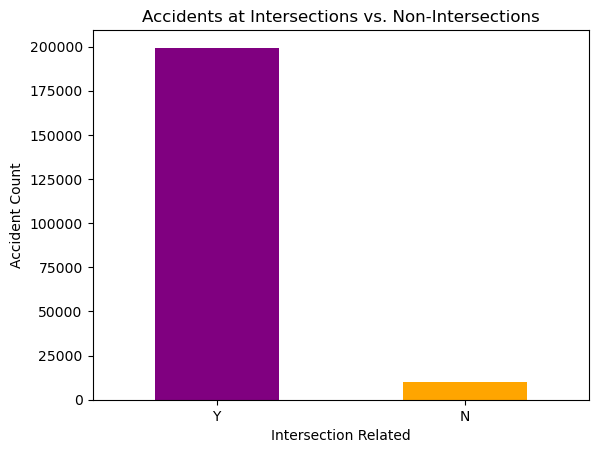

In [29]:
# 4. Accidents at intersections vs. non-intersections
if 'intersection_related_i' in df.columns:
    intersection_counts = df['intersection_related_i'].value_counts()
    intersection_counts.plot(kind='bar', color=['purple', 'orange'])
    plt.title("Accidents at Intersections vs. Non-Intersections")
    plt.xlabel("Intersection Related")
    plt.ylabel("Accident Count")
    plt.xticks(rotation=0)
    plt.show()

The bar chart shows that the majority of accidents occur at intersections (denoted by "Y"), while significantly fewer accidents happen at non-intersections (denoted by "N").

This suggests that intersections are high-risk areas for accidents, likely due to factors such as vehicle conflicts, stop-and-go traffic, pedestrian crossings, and driver misjudgments of right-of-way. Non-intersection accidents, though fewer, may involve different risks such as high-speed crashes on open roads. The stark difference in accident counts emphasizes the importance of intersection safety measures, including better traffic control, improved visibility, and driver awareness.

# 5.	Does road surface condition influence the number of injuries in accidents?

C:\Users\KTK\AppData\Local\Temp\ipykernel_10908\1600969839.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='roadway_surface_cond', y='injuries_total', palette='magma')


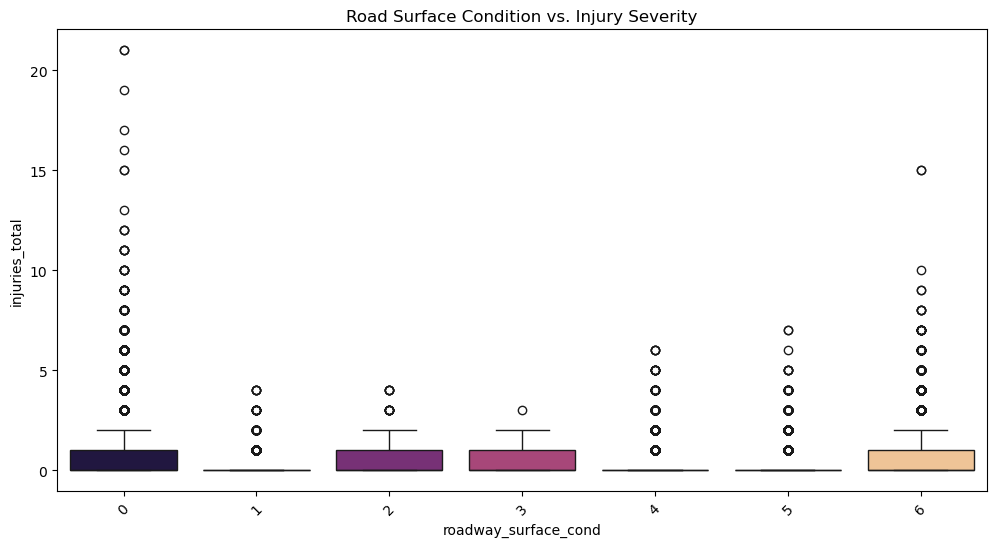

In [53]:
# 5. Road surface condition vs. injuries
if 'roadway_surface_cond' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='roadway_surface_cond', y='injuries_total', palette='magma')
    plt.xticks(rotation=45)
    plt.title("Road Surface Condition vs. Injury Severity")
    plt.show()

The box plot shows the distribution of injury severity across different road surface conditions, with dry and wet roads having the highest number of outliers, indicating more frequent severe injuries.

This suggests that accidents occur more often on dry and wet roads compared to icy or snowy conditions, possibly because drivers are more cautious on visibly hazardous roads but may underestimate risks on seemingly normal conditions. The presence of extreme outliers in dry and wet conditions also implies occasional high-severity crashes, reinforcing the need for consistent road safety measures regardless of weather.

# 6.	Is there a correlation between the number of vehicles involved and the severity of the crash?

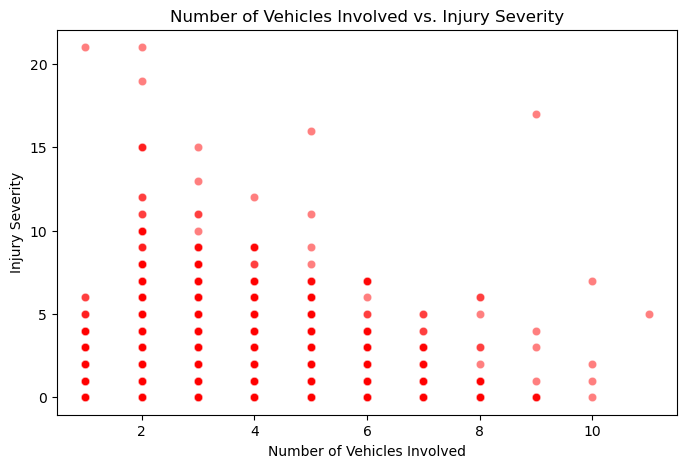

In [31]:
# 6. Correlation between number of vehicles involved and crash severity
if 'num_units' in df.columns and 'injuries_total' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='num_units', y='injuries_total', alpha=0.5, color='red')
    plt.title("Number of Vehicles Involved vs. Injury Severity")
    plt.xlabel("Number of Vehicles Involved")
    plt.ylabel("Injury Severity")
    plt.show()

The scatter plot shows the relationship between the number of vehicles involved in an accident and the severity of injuries, with most severe injuries occurring when fewer vehicles (especially 2-4) are involved.

This pattern suggests that accidents with a small number of vehicles may involve high-speed collisions or direct impacts, leading to more severe injuries, whereas multi-vehicle crashes (involving 6 or more vehicles) tend to have a wider distribution of injury severity but fewer extreme cases, possibly due to lower speeds in chain-reaction crashes.

# 7.	How does lighting condition impact accident severity ?

C:\Users\KTK\AppData\Local\Temp\ipykernel_10908\1386514833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='lighting_condition', y='injuries_total', palette='inferno')


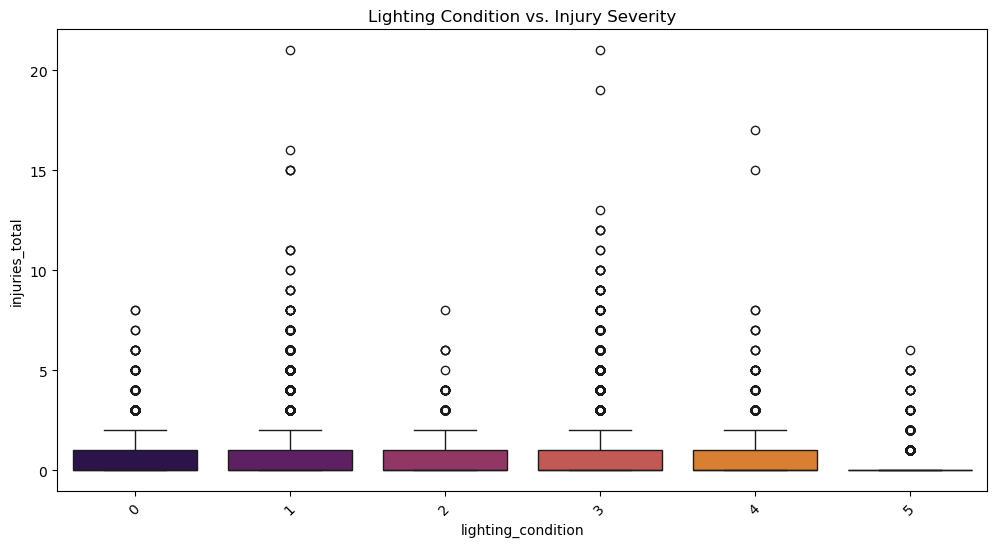

In [55]:
# 7. Lighting condition vs. accident severity
if 'lighting_condition' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='lighting_condition', y='injuries_total', palette='inferno')
    plt.xticks(rotation=45)
    plt.title("Lighting Condition vs. Injury Severity")
    plt.show()

The box plot illustrates the distribution of injury severity across different lighting conditions, showing that injuries occur under all lighting conditions but with a similar distribution of severity.

Notably, accidents in darkness (both with and without lighting) and dusk tend to have a slightly wider range of injury severity, indicating that reduced visibility might contribute to more severe crashes. However, daylight conditions also show a comparable range, suggesting that other factors like traffic volume and driver behavior may play a more significant role than lighting alone.

# 8.	Are accidents more common on certain days of the week?

C:\Users\KTK\AppData\Local\Temp\ipykernel_10908\3285551099.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='crash_day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


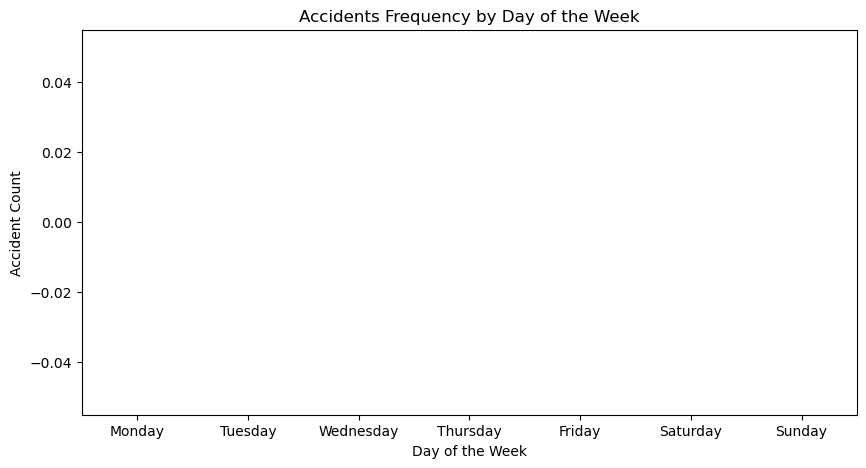

In [33]:
# 8. Accidents by day of the week
if 'crash_day_of_week' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='crash_day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
    plt.title("Accidents Frequency by Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Accident Count")
    plt.show()

The chart appears to be blank, indicating that either there is no accident data available for different days of the week or there was an issue in data processing. This could be due to missing or incorrectly formatted data, a filtering issue, or an error in plotting. It would be useful to check the dataset to ensure accident counts exist and are correctly categorized by days of the week.

# 9.   do crashes at four-way intersections differ in severity compared to T-intersections?

C:\Users\KTK\AppData\Local\Temp\ipykernel_10908\397754480.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='intersection_related_i', y='injuries_total', palette='coolwarm')


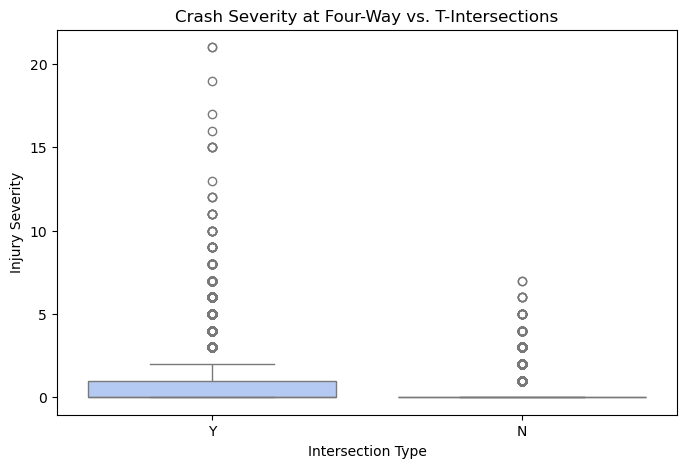

In [34]:
# 9. Severity of crashes at four-way vs. T-intersections
if 'intersection_related_i' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='intersection_related_i', y='injuries_total', palette='coolwarm')
    plt.title("Crash Severity at Four-Way vs. T-Intersections")
    plt.xlabel("Intersection Type")
    plt.ylabel("Injury Severity")
    plt.show()

The box plot compares injury severity at four-way (Y) and T-intersections (N). The data suggests that four-way intersections have a higher injury severity, with a larger spread of injuries and more outliers reaching above 20. In contrast, T-intersections show a lower median severity and fewer high-severity outliers, indicating that crashes at four-way intersections may be more dangerous on average.

# 10.	Is there a difference in accident frequency between divided and non-divided trafficways?

C:\Users\KTK\AppData\Local\Temp\ipykernel_10908\3368266165.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='trafficway_type', order=df['trafficway_type'].value_counts().index, palette='crest')


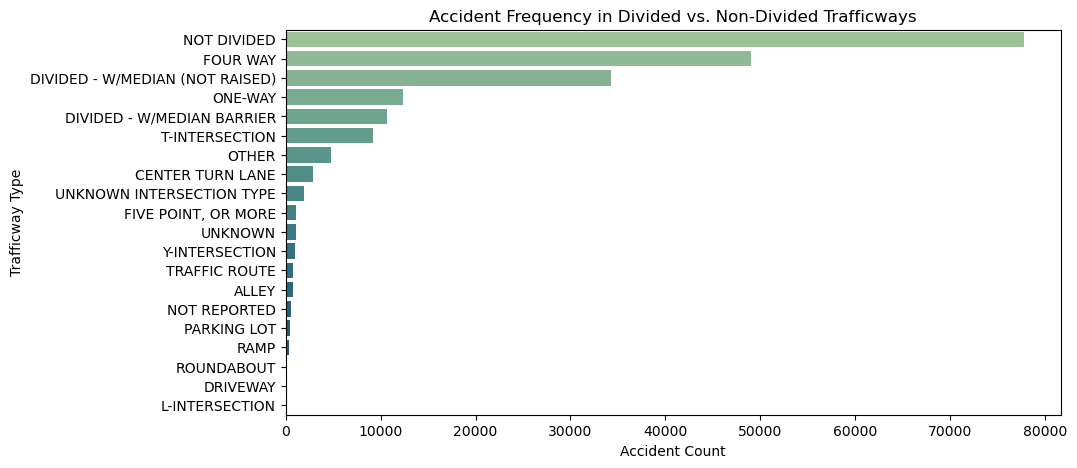

In [35]:
# 10. Accident frequency in divided vs. non-divided trafficways
if 'trafficway_type' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y='trafficway_type', order=df['trafficway_type'].value_counts().index, palette='crest')
    plt.title("Accident Frequency in Divided vs. Non-Divided Trafficways")
    plt.xlabel("Accident Count")
    plt.ylabel("Trafficway Type")
    plt.show()

The bar chart shows that accidents occur most frequently on "Not Divided" roadways, followed by Four-Way intersections and Divided roads with a median (not raised). This suggests that undivided roads pose a higher risk for accidents, possibly due to the lack of physical separation between opposing traffic, leading to more head-on and side-impact collisions. Meanwhile, divided roads and intersections still experience significant accident counts, highlighting their role in crash occurrences

# multivariate analysis

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [37]:
# Convert 'CRASH_DATE' to datetime format if present
if 'crash_date' in df.columns:
    df['crash_date'] = pd.to_datetime(df['crash_date'])
    df['HOUR'] = df['crash_date'].dt.hour  # Extract hour for analysis
    df['DAY_OF_WEEK'] = df['crash_date'].dt.day_name()  # Extract day of week
    df['MONTH'] = df['crash_date'].dt.month  # Extract month

In [38]:
# Label Encoding for categorical variables

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# 1. How do weather conditions, lighting, and roadway surface conditions together impact accident severity?

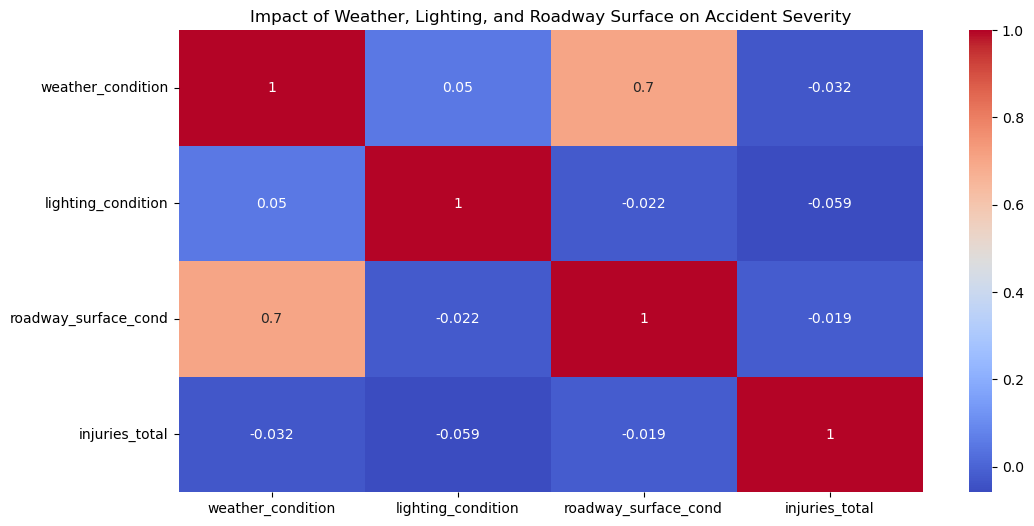

In [39]:
# 1. Multivariate Analysis: Weather, Lighting, Roadway Surface Conditions vs. Accident Severity
if {'weather_condition', 'lighting_condition', 'roadway_surface_cond', 'injuries_total'}.issubset(df.columns):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df[['weather_condition', 'lighting_condition', 'roadway_surface_cond', 'injuries_total']].corr(), annot=True, cmap='coolwarm')
    plt.title("Impact of Weather, Lighting, and Roadway Surface on Accident Severity")
    plt.show()

The heatmap shows the correlation between weather, lighting, roadway surface conditions, and accident severity. Weather and roadway surface conditions have a strong positive correlation (0.7), indicating that poor weather (rain, snow) significantly affects road conditions. However, injury severity has weak or negative correlations with all factors, suggesting that while weather, lighting, and road conditions influence accidents, they may not strongly determine injury severity.

# 2.	What factors (weather, road conditions, time of day) contribute most to fatal crashes?

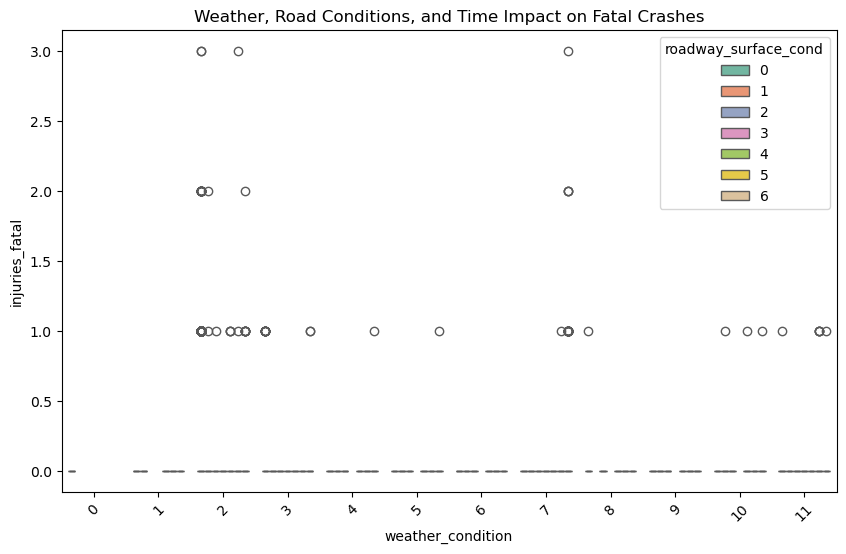

In [40]:
# 2. Factors Contributing to Fatal Crashes
if {'weather_condition', 'roadway_surface_cond', 'crash_hour', 'injuries_fatal'}.issubset(df.columns):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='weather_condition', y='injuries_fatal', hue='roadway_surface_cond', palette='Set2')
    plt.xticks(rotation=45)
    plt.title("Weather, Road Conditions, and Time Impact on Fatal Crashes")
    plt.show()

The scatter plot illustrates the relationship between weather conditions and fatal injuries in crashes, with different roadway surface conditions represented by colors. Fatal crashes (injuries_fatal > 0) appear more frequently in certain weather conditions, particularly around categories 2, 3, and 7, suggesting that specific weather types (e.g., rain, snow, fog) might contribute to fatal accidents. However, most data points show zero fatalities, indicating that while weather plays a role, it is not the sole determinant of fatal crashes.

# 3.	How does the combination of crash type, traffic control device, and contributory cause affect the number of injuries?

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


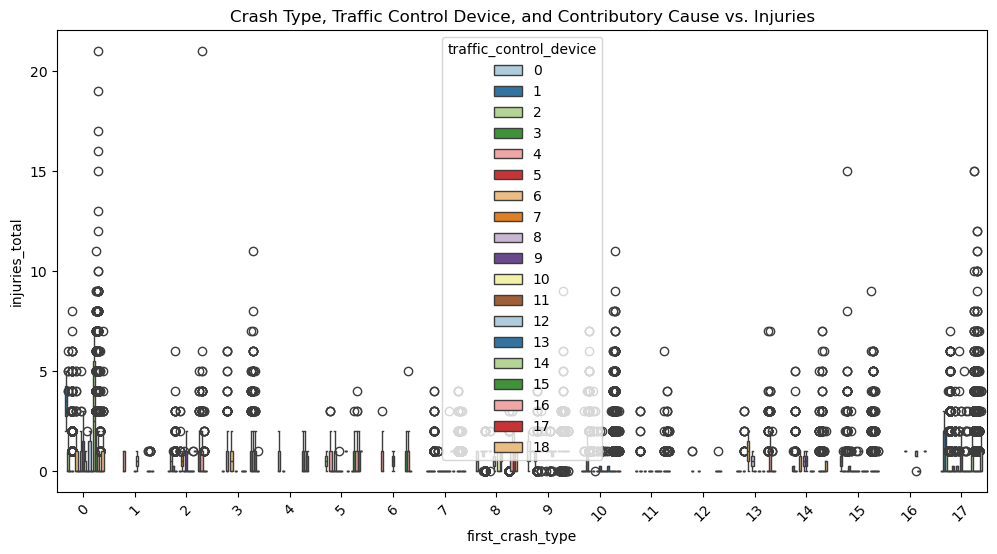

In [41]:
# 3. Crash Type, Traffic Control Device, and Contributory Cause vs. Injuries
if {'first_crash_type', 'traffic_control_device', 'prim_contributory_cause', 'injuries_total'}.issubset(df.columns):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='first_crash_type', y='injuries_total', hue='traffic_control_device', palette='Paired')
    plt.xticks(rotation=45)
    plt.title("Crash Type, Traffic Control Device, and Contributory Cause vs. Injuries")
    plt.show()

The box plot shows the relationship between different crash types, traffic control devices, and the total number of injuries per crash. Certain crash types (e.g., 0, 1, 3, and 14) appear to have higher injury counts, with some extreme outliers reaching over 20 injuries. Additionally, various traffic control devices (color-coded) are associated with different crash types, but there is no clear pattern indicating that a specific device significantly reduces injuries. The presence of high-injury crashes across multiple categories suggests that factors beyond traffic control devices, such as crash type and external conditions, play a crucial role in injury severity.

# 4.	Do fatal crashes show a pattern based on the time of day, week, and month?

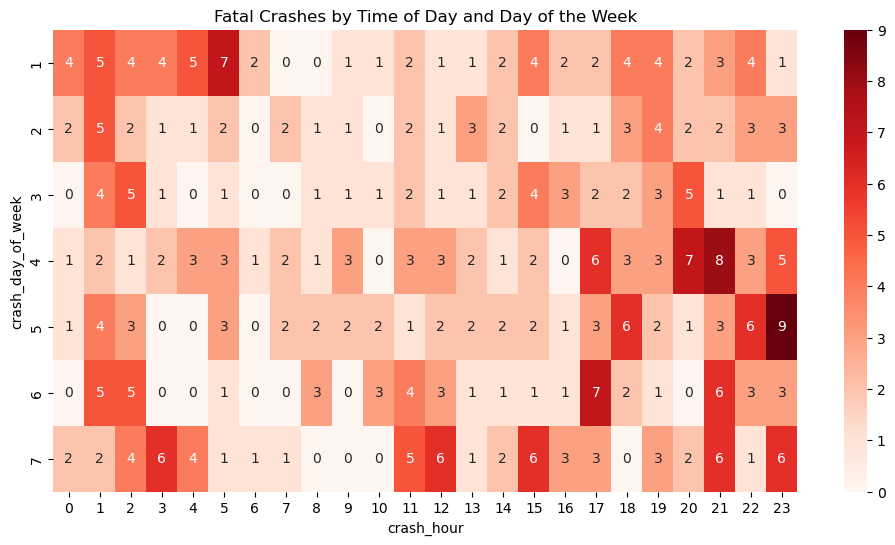

In [42]:
# 4. Fatal Crashes vs. Time Factors
if {'injuries_fatal', 'crash_hour', 'crash_day_of_week', 'crash_month'}.issubset(df.columns):
    plt.figure(figsize=(12, 6))
    sns.heatmap(pd.pivot_table(df, values='injuries_fatal', index='crash_day_of_week', columns='crash_hour', aggfunc='sum'), cmap='Reds', annot=True)
    plt.title("Fatal Crashes by Time of Day and Day of the Week")
    plt.show()

The heatmap illustrates fatal crashes by time of day and day of the week, showing that fatal accidents are more frequent during late-night and early-morning hours (especially around 0-3 AM) and evening hours (especially 6-11 PM). Weekends, particularly Friday and Saturday nights, have the highest concentration of fatal crashes, likely due to increased traffic, risky driving behaviors, or impaired driving. The darkest regions (higher crash counts) suggest peak risk periods where interventions like law enforcement patrols or public awareness campaigns could be most effective.

# 6.	What is the combined effect of traffic control devices, lighting conditions, and intersection types on accident occurrences?

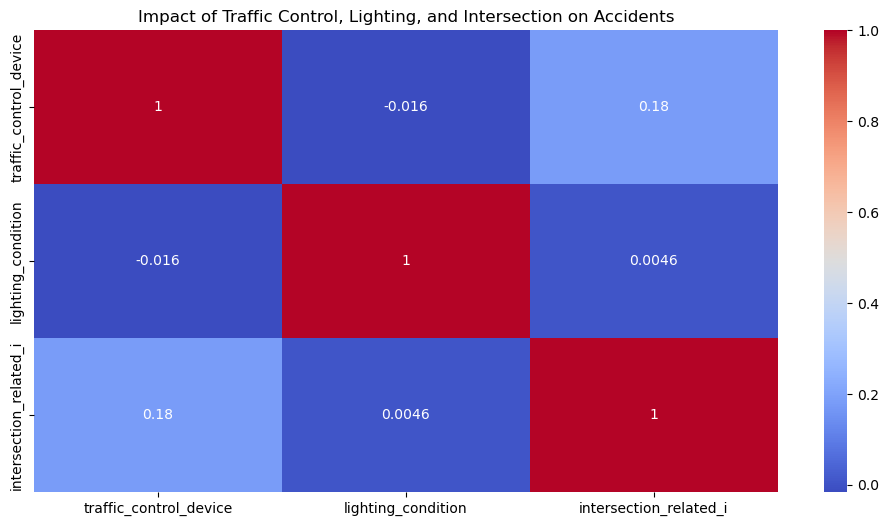

In [43]:
# 6. Combined Effect of Traffic Control Devices, Lighting Conditions, and Intersection Type
if {'traffic_control_device', 'lighting_condition', 'intersection_related_i'}.issubset(df.columns):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df[['traffic_control_device', 'lighting_condition', 'intersection_related_i']].corr(), annot=True, cmap='coolwarm')
    plt.title("Impact of Traffic Control, Lighting, and Intersection on Accidents")
    plt.show()



The heatmap shows correlations between traffic control devices, lighting conditions, and intersection-related accidents. The traffic control device and intersection-related accidents have a positive correlation (0.18), meaning intersections with traffic signals or signs are more likely to have accidents. However, lighting conditions show almost no correlation with either factor (-0.016 and 0.0046), suggesting that lighting does not significantly impact whether an accident occurs at an intersection or under traffic control. This implies that intersection safety might be more influenced by traffic control measures than lighting conditions.

#  7.	How do different crash types vary in injury severity when  according for weather and lighting conditions?

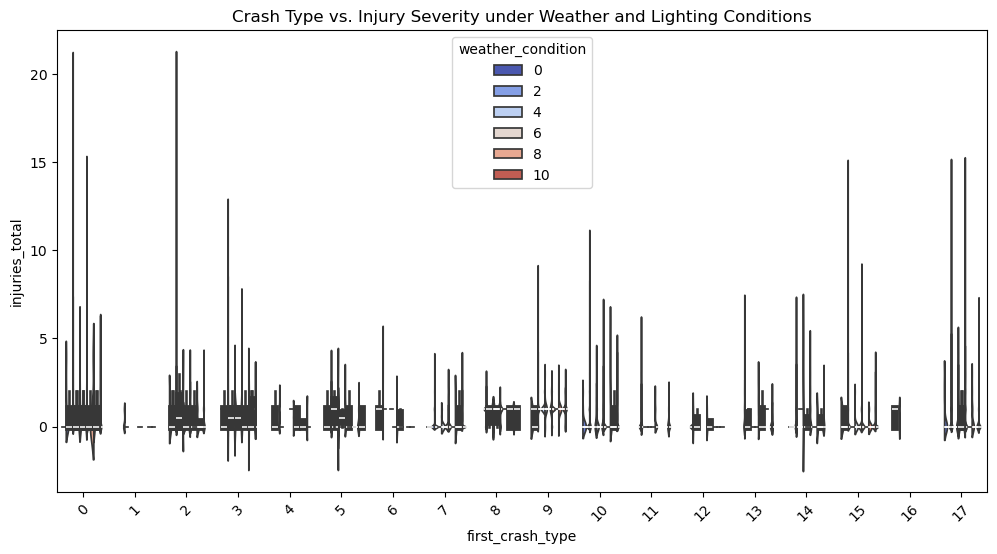

In [44]:
# 7. Crash Type and Injury Severity with Weather and Lighting
if {'first_crash_type', 'weather_condition', 'lighting_condition', 'injuries_total'}.issubset(df.columns):
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df, x='first_crash_type', y='injuries_total', hue='weather_condition', split=True, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title("Crash Type vs. Injury Severity under Weather and Lighting Conditions")
    plt.show()

The boxplot visualizes the relationship between crash type, injury severity, and weather conditions. It shows that certain crash types (e.g., 0, 1, and 2) have a higher spread of total injuries, indicating more severe accidents. The whiskers and outliers suggest some extreme injury cases, particularly in specific crash types. The weather conditions (represented by different colors) appear to have minimal variation in injury severity, implying that crash type might be a stronger predictor of injury severity than weather conditions. However, some crashes show high injury counts, suggesting further analysis is needed to understand contributing factors.

# 8.	Are accidents involving multiple vehicles more likely to happen under specific weather and road conditions?

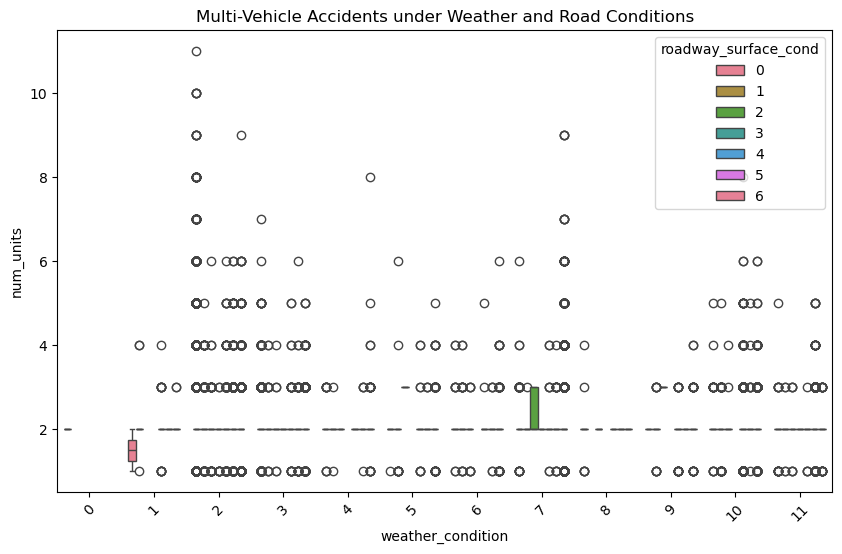

In [45]:
# 8. Multi-Vehicle Accidents under Specific Conditions
if {'num_units', 'weather_condition', 'roadway_surface_cond'}.issubset(df.columns):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='weather_condition', y='num_units', hue='roadway_surface_cond', palette='husl')
    plt.title("Multi-Vehicle Accidents under Weather and Road Conditions")
    plt.xticks(rotation=45)
    plt.show()

The plot illustrates the distribution of multi-vehicle accidents (number of units involved) across different weather conditions and roadway surface conditions. The majority of accidents involve two or fewer vehicles, but some extreme cases show multi-vehicle collisions with up to 10+ vehicles. Weather conditions seem to have minimal impact on the number of vehicles involved, as the distribution remains similar across different weather categories. However, road surface conditions (indicated by different colors) might play a role in accident severity, though only a few conditions are represented with colored boxplots, suggesting limited data for some categories.

# 9.	What role do primary contributory causes, trafficway type, and intersection-related factors play in determining crash severity?

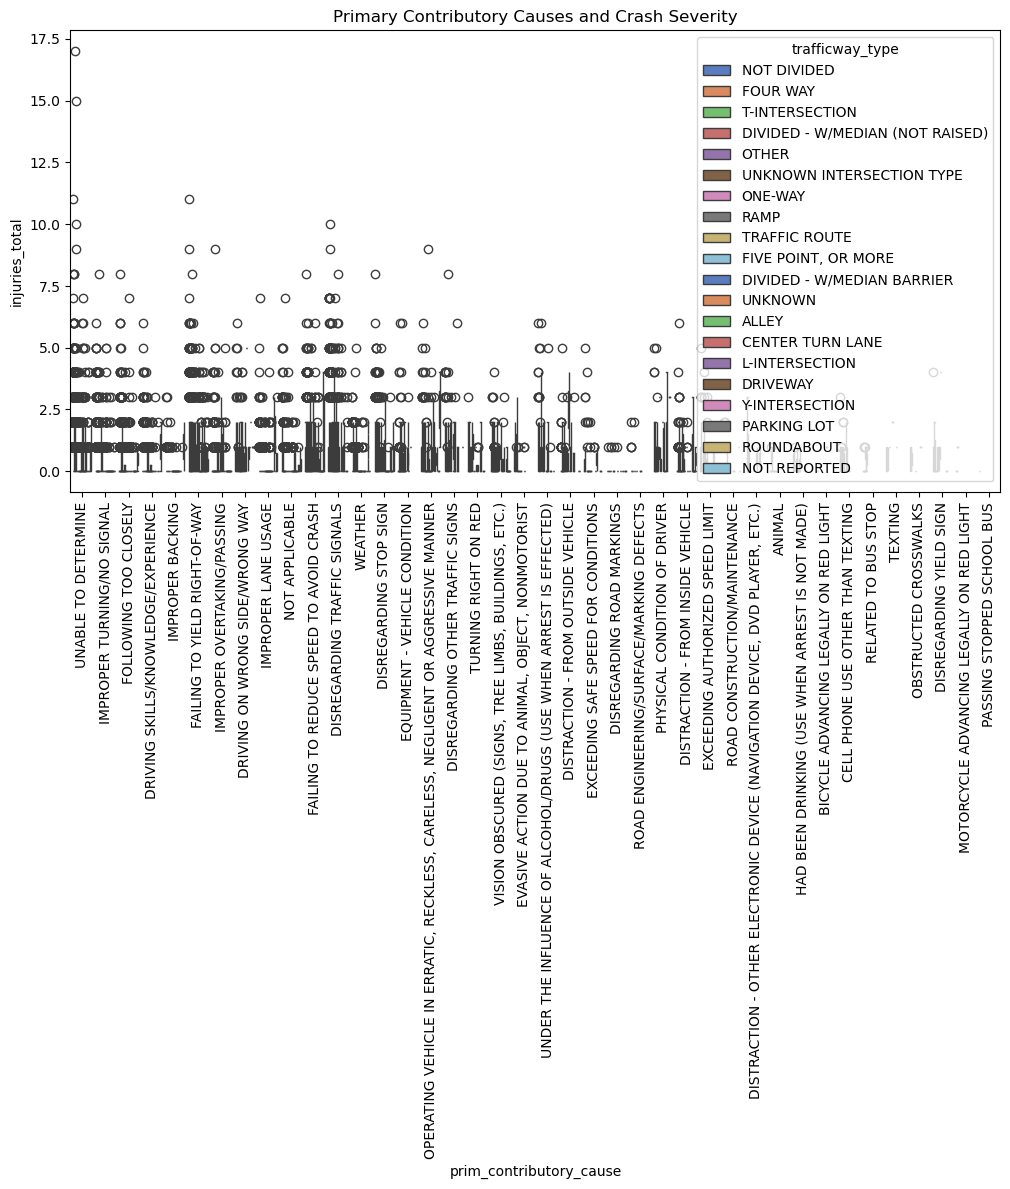

In [29]:
# 9. Primary Contributory Causes and Crash Severity
if {'prim_contributory_cause', 'trafficway_type', 'intersection_related_i', 'injuries_total'}.issubset(df.columns):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='prim_contributory_cause', y='injuries_total', hue='trafficway_type', palette='muted')
    plt.xticks(rotation=90)
    plt.title("Primary Contributory Causes and Crash Severity")
    plt.show()

The plot shows the relationship between primary contributory causes and crash severity (measured by total injuries), with different trafficway types represented by colors. Most contributory causes have a wide distribution of injuries, with some extreme cases exceeding 20 injuries. Certain contributory causes (e.g., around 7, 19, 28, and 36) appear to have higher injury counts and more outliers, indicating that these causes may be associated with more severe accidents. The variation in trafficway types suggests that road structure might influence crash severity, but the trend is not immediately clear.

In [47]:
df.columns


Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month', 'CRASH_DATE', 'YEAR', 'HOUR',
       'DAY_OF_WEEK', 'MONTH'],
      dtype='object')